In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [3]:
eda = mysql.connector.Connect(
    host = "database-1.c96mmei8egml.ap-northeast-2.rds.amazonaws.com",
    port = "3306",
    user = "eda_hb",
    password = "hb",
    database = "eda_project"
)
cursor = eda.cursor()

In [7]:
cursor.execute("SELECT win, AVG(dragon), AVG(baron), AVG(tower) from match_data where win like '1' and ranking like 'high'")

result = cursor.fetchall()

win_df = pd.DataFrame(result)

win_df

,0,1,2,3
0,1,0.5868,0.5229,0.6686


In [8]:
cursor.execute("SELECT win, AVG(dragon), AVG(baron), AVG(tower) from match_data where win like '0' and ranking like 'high'")

result = cursor.fetchall()

lose_df = pd.DataFrame(result)

lose_df

,0,1,2,3
0,0,0.3335,0.1092,0.2524


In [9]:
merge_vision = pd.concat([win_df,lose_df])

merge_vision

,0,1,2,3
0,1,0.5868,0.5229,0.6686
0,0,0.3335,0.1092,0.2524


In [33]:
merge_vision = pd.concat([win_df,lose_df])

merge_vision = merge_vision.rename(columns={0 : 'win/lose', 1 : 'dragon', 2 : 'baron', 3 : 'tower'})


merge_vision

,win/lose,dragon,baron,tower
0,1,0.5868,0.5229,0.6686
0,0,0.3335,0.1092,0.2524


In [20]:
merge_vision['dragon'] = merge_vision['dragon'].astype(float)
merge_vision['baron'] = merge_vision['baron'].astype(float)
merge_vision['tower'] = merge_vision['tower'].astype(float)

In [11]:
cursor.execute("SELECT win, AVG(dragon), AVG(baron), AVG(tower) from match_data where win like '1' and ranking like 'low'")

result = cursor.fetchall()

win_df2 = pd.DataFrame(result)

win_df2

,0,1,2,3
0,1,0.5917,0.5257,0.6701


In [12]:
cursor.execute("SELECT win, AVG(dragon), AVG(baron), AVG(tower) from match_data where win like '0' and ranking like 'low'")

result = cursor.fetchall()

lose_df2 = pd.DataFrame(result)

lose_df2

,0,1,2,3
0,0,0.3280,0.1037,0.2512


In [14]:
merge_vision2 = pd.concat([win_df2,lose_df2])

merge_vision2 = merge_vision2.rename(columns={0 : 'win/lose', 1 : 'dragon', 2 : 'baron', 3 : 'tower'})

merge_vision2

,win/lose,dragon,baron,tower
0,1,0.5917,0.5257,0.6701
0,0,0.3280,0.1037,0.2512


In [21]:
merge_vision2['dragon'] = merge_vision2['dragon'].astype(float)
merge_vision2['baron'] = merge_vision2['baron'].astype(float)
merge_vision2['tower'] = merge_vision2['tower'].astype(float)

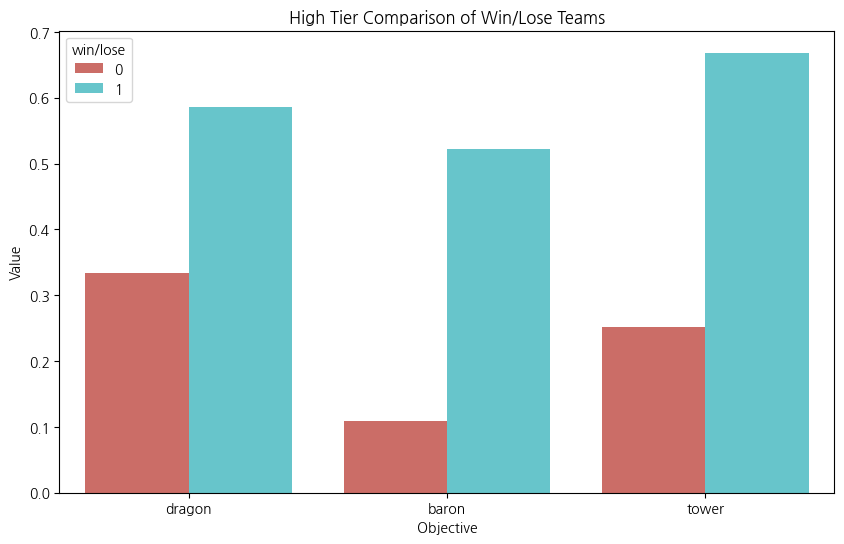

In [37]:
df_melted = merge_vision.melt(id_vars='win/lose', var_name='objective', value_name='value')
df_melted2 = merge_vision2.melt(id_vars='win/lose', var_name='objective', value_name='value')

plt.figure(figsize=(10, 6)) 
sns.barplot(x='objective', y='value', hue='win/lose', data=df_melted, palette='hls') 
plt.title('High Tier Comparison of Win/Lose Teams') 
plt.xlabel('Objective') 
plt.ylabel('Value')

plt.show()



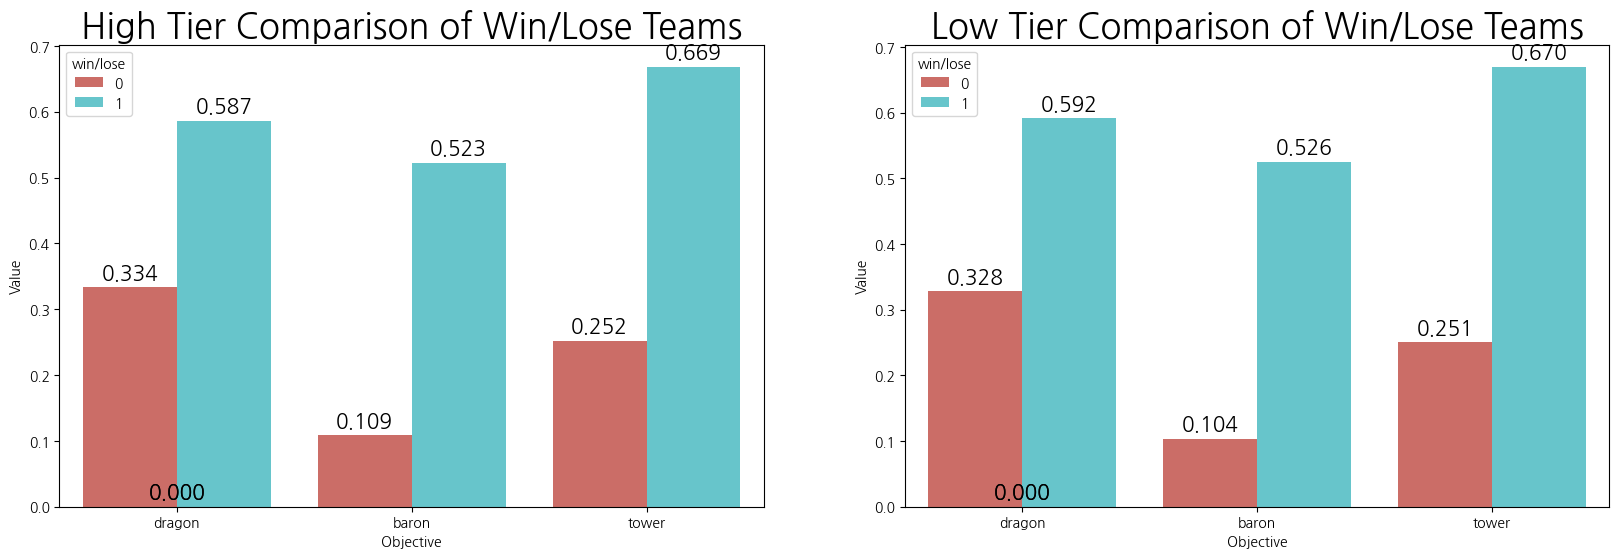

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # 1행 2열의 서브플롯 생성

# 첫 번째 서브플롯에 그래프 그리기
sns.barplot(x='objective', y='value', hue='win/lose', data=df_melted, palette='hls', ax=axes[0])
axes[0].set_title('High Tier Comparison of Win/Lose Teams', fontsize= 25)
axes[0].set_xlabel('Objective')
axes[0].set_ylabel('Value')

for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize= 15)

# 두 번째 서브플롯에 그래프 그리기
sns.barplot(x='objective', y='value', hue='win/lose', data=df_melted2, palette='hls', ax=axes[1])
axes[1].set_title('Low Tier Comparison of Win/Lose Teams', fontsize= 25)
axes[1].set_xlabel('Objective')
axes[1].set_ylabel('Value')

for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize= 15)

plt.show()